In [ ]:
## Dingyi Kang
## A20308046
## Assignment1 - problem 2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/My Drive/Assignment1_Q2_Data.csv")
# remove unused column
data = data.drop(columns = "House ID")
data.head()

,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home,Construction type,Architecture type,# Fire places,Price (1000$)
0,4.9176,1.0,3.472,0.998,1.0,7,4,42,3,1,0,25.9
1,5.0208,1.0,3.531,1.500,2.0,7,4,62,1,1,0,29.5
2,4.5429,1.0,2.275,1.175,1.0,6,3,40,2,1,0,27.9
3,4.5573,1.0,4.050,1.232,1.0,6,3,54,4,1,0,25.9
4,5.0597,1.0,4.455,1.121,1.0,6,3,42,3,1,0,29.9


Based on observation of the data table above, we can build multiple-variable linear regression model.
From the table, we extract features including local price, number of bathrooms, land area, living area, number of garages, number of rooms, number of bedrooms, age of home, constrction type, architecture type, and number of fire places.
The target dependent variable is price.
Hence, we can build a model with 11 features. Let's represent it as y = a*x1 + b*x2 + cx3 + dx4 + ex5 + fx6 + gx7 + hx8 + ix9 + jx10 + kx11 + m


In [ ]:
# let's use the same gradien descent function as problem1
# theta is the vector of parameters (i.e., a, b, c, d in this case) while X is the matrix of different features
def hypothesis(X, theta):
    y = theta*X
    return np.sum(y, axis=1)

# let's use mean square error function as the loss function
# theta is the vector of parameters
# X is the matrix of different features
# y is the vector of targeted values
def loss(X, y, theta):
    y1 = hypothesis(X, theta)
    # num of rows -- len(X)
    return sum((y1-y)**2)/len(X)

# we develop gradien descent function based on Least Mean Squares update rule
# This function returns two things: one is a vector J which is loss function values associated with each iterations; the second one is the theta with minimized loss function value
def gradientDescent(X, y, theta, leanringRate, iterations):
    J=[]
    k=0
    while k < iterations:
        y1 = hypothesis(X, theta)
        for c in range(0, X.shape[1]):
            theta[c] = theta[c] + leanringRate*sum((y-y1)* X[:, c])/len(X)
        j = loss(X, y, theta)
        J.append(j)
        k += 1
    return J, theta

(28, 12)

0th fold:
[[ 4.9176  1.      3.472   0.998   1.      7.      4.     42.      3.
   1.      0.      1.    ]
 [ 5.0208  1.      3.531   1.5     2.      7.      4.     62.      1.
   1.      0.      1.    ]
 [ 4.5429  1.      2.275   1.175   1.      6.      3.     40.      2.
   1.      0.      1.    ]
 [ 4.5573  1.      4.05    1.232   1.      6.      3.     54.      4.
   1.      0.      1.    ]
 [ 5.0597  1.      4.455   1.121   1.      6.      3.     42.      3.
   1.      0.      1.    ]
 [ 3.891   1.      4.455   0.988   1.      6.      3.     56.      2.
   1.      0.      1.    ]
 [ 5.898   1.      5.85    1.24    1.      7.      3.     51.      2.
   1.      1.      1.    ]]
The result theta of 0th fold is:
[ 2.06723704  3.98172018  0.55004383  6.71680827  0.26480531  0.50790117
  0.59744633 -0.15217686  1.17738007 -0.45162759  2.62825059  0.56110595]
The minimum of 0th fold is:
12.564104942196098
The prediction error of 0th fold is:
20.443737382446635

1th fold:
[[ 5.6

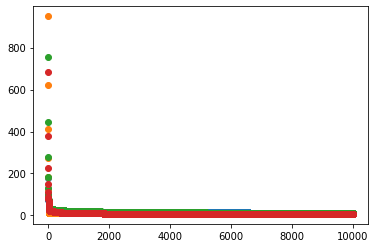

In [ ]:
# let's build the vector of target values from the data table
dM = data.to_numpy()
print(dM.shape)

# given the data only has 28 samples, we can use k-fold cross validation with k = 4, namely each fold has 7 data sample

# get kth fold as test dataset
sumError = 0
sumTheta = np.ones(12)

for i in range(0, 4):
  print("\n" +str(i) + "th fold:")
  testM = dM[i*7:(i+1)*7, :]
  XTest = testM[:, 0:11]
  yTest = testM[:, 11]
  constant = np.ones((7, 1))
  #print(constant)
  XTest = np.append(XTest, constant, axis=1)

  print(XTest)
  #print(XTest.shape)
  #print(yTest)

  trainM = np.delete(dM, [7*i, 7*i+1, 7*i+2, 7*i+3, 7*i+4, 7*i+5, 7*i+6], axis=0)
  XTrain = trainM[:, 0:11]
  yTrain = trainM[:, 11]

  constant = np.ones((21, 1))
  #print(constant)
  XTrain = np.append(XTrain, constant, axis=1)
  #print(XTrain)
  #print(yTrain)
  #print(XTrain.shape)

  # let's begin to train the model and get the theta with the initial guess of each parameter as 1
  learningRate = 0.001
  numOfIterations = 10000
  # out initial guess is 1 for the weight of each feature
  theta = np.ones(12)
  #print(theta)
  J, theta = gradientDescent(XTrain, yTrain, theta, learningRate, numOfIterations)
  print("The result theta of " + str(i) + "th fold is:")
  print(theta)

  print("The minimum loss function value of " + str(i) + "th fold is:")
  error = loss(XTrain, yTrain, theta)
  print(error)
  j = np.array(J)
  plt.scatter(list(range(0, len(j))), j) 
  

  print("The prediction error of " + str(i) + "th fold is:")
  preError = loss(XTest, yTest, theta)
  print(preError)

  sumError += preError
  sumTheta += theta
print()
print("The average least square error of this model after this 4-fold cross validation is:")
print(sumError/4)
print("The average weight of features of this model after this 4-fold cross validation is:")
print(sumTheta/4)



Based on above result, we can see the average least squares error of this linear regression model for the given data is 54.31. This my answer to question1.

For question 2, as we can see from all result thetas and the average theta we got from the 4-fold cross validation, the 4th feature in the theta has greatest weight value since it has the greatest maginute value. The 4th element in theta correspond to the feature -- living area.
Hence, we can say living area is the factor has the most effect on final result.
Next, let's the error result if we only use it to predict the price.


(28, 12)

0th fold:
The result theta of 0th fold is:
[21.65286251  6.52054119]
The minimum loss function value of 0th fold is:
33.830545433545794
The prediction error of 0th fold is:
25.11643743283153

1th fold:
The result theta of 1th fold is:
[16.53497997 12.08111279]
The minimum loss function value of 1th fold is:
20.893155162600994
The prediction error of 1th fold is:
119.75799382228698

2th fold:
The result theta of 2th fold is:
[22.24455818  4.45092464]
The minimum loss function value of 2th fold is:
29.25452566559225
The prediction error of 2th fold is:
31.509739557457557

3th fold:
The result theta of 3th fold is:
[22.49294211  4.7396457 ]
The minimum loss function value of 3th fold is:
32.147377560190776
The prediction error of 3th fold is:
23.34018676972809

The average least square error of this model after this 4-fold cross validation is:
49.93108939557604


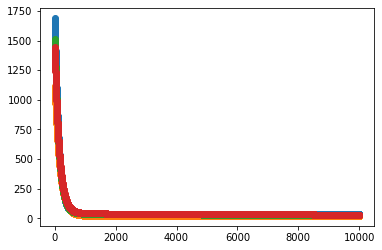

In [ ]:
#let build model y = ax + b which x is living area

# let's build the vector of target values from the data table
dM = data.to_numpy()
print(dM.shape)

# given the data only has 28 samples, we can use k-fold cross validation with k = 4, namely each fold has 7 data sample

# get kth fold as test dataset
sumError = 0
for i in range(0, 4):
  print("\n" +str(i) + "th fold:")
  testM = dM[i*7:(i+1)*7, :]
  XTest = testM[:, 3:4]
  yTest = testM[:, 11]
  constant = np.ones((7, 1))
  #print(constant
  #print(yTest)
  XTest = np.append(XTest, constant, axis=1)
  #print(XTest)
  #print(XTest.shape)

  trainM = np.delete(dM, [7*i, 7*i+1, 7*i+2, 7*i+3, 7*i+4, 7*i+5, 7*i+6], axis=0)
  XTrain = trainM[:, 3:4]
  yTrain = trainM[:, 11]

  constant = np.ones((21, 1))
  #print(constant)
  XTrain = np.append(XTrain, constant, axis=1)
  #print(XTrain)
  #print(yTrain)
  #print(XTrain.shape)

  # let's begin to train the model and get the theta with the initial guess of each parameter as 1
  learningRate = 0.001
  numOfIterations = 10000
  # out initial guess is 1 for the weight of each feature
  theta = np.ones(2)
  #print(theta)
  J, theta = gradientDescent(XTrain, yTrain, theta, learningRate, numOfIterations)
  print("The result theta of " + str(i) + "th fold is:")
  print(theta)

  print("The minimum loss function value of " + str(i) + "th fold is:")
  error = loss(XTrain, yTrain, theta)
  print(error)
  j = np.array(J)
  plt.scatter(list(range(0, len(j))), j) 
  

  print("The prediction error of " + str(i) + "th fold is:")
  preError = loss(XTest, yTest, theta)
  print(preError)

  sumError += preError
print()
print("The average least square error of this model after this 4-fold cross validation is:")
print(sumError/4)

Based on the result above, we can see: if we only use the feature of living area to predict the price of house, the prediction error doesn't change much (previous one is 54.31 while the current one is 49.93108939557604).

Actually, the average prediction error get slightly smaller.

Hence, I think we can solely use the feature of living area to predict house prices.

For question 3, as we can see from the result of model with 11 features, the 10th element in theta vector has the least magnitude value which is -0.01087832. This element corresponds to architecture type.

Hence, we can say architecture type of house is the factor which has the least effect on the final value.

About the effect of removing it from model? Let's see!

(28, 12)

0th fold:
(7, 11)
The result theta of 0th fold is:
[ 2.0364831   4.27299258  0.54284522  6.8844017   0.23632555  0.20114851
  0.93630936 -0.14439796  1.16874591  2.85675556  0.2991407 ]
The minimum loss function value of 0th fold is:
12.30767578627975
The prediction error of 0th fold is:
20.140447278871456

1th fold:
(7, 11)
The result theta of 1th fold is:
[ 1.19436757  3.49483247  0.65608532  2.70869604  0.72554759  1.81082852
 -0.13559119 -0.08222019  1.14660825  1.38749752  2.57166226]
The minimum loss function value of 1th fold is:
7.730620152587387
The prediction error of 1th fold is:
95.47509089244862

2th fold:
(7, 11)
The result theta of 2th fold is:
[ 2.38819968  4.30381585  0.43177694  6.93741002 -0.25959031 -0.46878384
  1.91829322 -0.0355251   0.5382963  -0.46564288 -0.5334172 ]
The minimum loss function value of 2th fold is:
11.827823332021477
The prediction error of 2th fold is:
20.073953999889934

3th fold:
(7, 11)
The result theta of 3th fold is:
[ 3.40949495

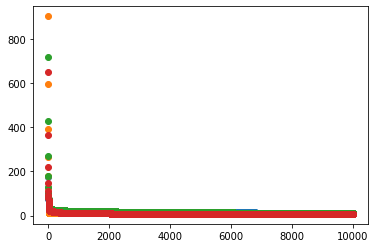

In [ ]:
#let build model withou feature of architecture type which index is 9 in theta

# let's build the vector of target values from the data table
dM = data.to_numpy()
print(dM.shape)

# lets remove the feature of architecture type
dM = np.delete(dM, [9], axis=1)
# given the data only has 28 samples, we can use k-fold cross validation with k = 4, namely each fold has 7 data sample

# get kth fold as test dataset
sumError = 0
for i in range(0, 4):
  print("\n" +str(i) + "th fold:")
  testM = dM[i*7:(i+1)*7, :]
  XTest = testM[:, 0:10]
  yTest = testM[:, 10]
  constant = np.ones((7, 1))
  #print(constant)
  #print(yTest)
  XTest = np.append(XTest, constant, axis=1)
  #print(XTest)
  print(XTest.shape)

  trainM = np.delete(dM, [7*i, 7*i+1, 7*i+2, 7*i+3, 7*i+4, 7*i+5, 7*i+6], axis=0)
  XTrain = trainM[:, 0:10]
  yTrain = trainM[:, 10]

  constant = np.ones((21, 1))
  #print(constant)
  XTrain = np.append(XTrain, constant, axis=1)
  #print(XTrain)
  #print(yTrain)
  #print(XTrain.shape)

  # let's begin to train the model and get the theta with the initial guess of each parameter as 1
  learningRate = 0.001
  numOfIterations = 10000
  # out initial guess is 1 for the weight of each feature
  theta = np.ones(11)
  #print(theta)
  J, theta = gradientDescent(XTrain, yTrain, theta, learningRate, numOfIterations)
  print("The result theta of " + str(i) + "th fold is:")
  print(theta)

  print("The minimum loss function value of " + str(i) + "th fold is:")
  error = loss(XTrain, yTrain, theta)
  print(error)
  j = np.array(J)
  plt.scatter(list(range(0, len(j))), j) 
  

  print("The prediction error of " + str(i) + "th fold is:")
  preError = loss(XTest, yTest, theta)
  print(preError)

  sumError += preError
print()
print("The average least square error of this model after this 4-fold cross validation is:")
print(sumError/4)

Based on the result above, we can see: if we only remove the feature of architecture from the model, the prediction error doesn't change much (previous one is 54.31 while the current one is 52.6783).

Hence, the effect of removing this feature from model on performance of this model is trivial.